In [1]:
import pandas as pd
import numpy as np

In [2]:
crime_police = pd.read_csv('data/2000_2020_경찰서_5대범죄.csv', encoding='cp949')
crime_police.head(10)

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,1
2,중부,강도,발생,3
3,중부,강도,검거,4
4,중부,"강간,추행",발생,113
5,중부,"강간,추행",검거,76
6,중부,절도,발생,943
7,중부,절도,검거,495
8,중부,폭력,발생,997
9,중부,폭력,검거,830


In [3]:
crime_police.set_index(['구분', '죄종', '발생검거'], inplace=True)
crime_police.head(10)

건수
구분 죄종    발생검거     
중부 살인    발생      1
         검거      1
   강도    발생      3
         검거      4
   강간,추행 발생    113
         검거     76
   절도    발생    943
         검거    495
   폭력    발생    997
         검거    830

In [4]:
crime_police = crime_police.unstack(-1)
crime_police.head(10)

건수      
발생검거        검거    발생
구분 죄종               
강남 강간,추행   433   513
   강도       10    12
   살인        3     5
   절도     1016  1941
   폭력     1911  2283
강동 강간,추행   167   188
   강도       14    15
   살인        3     3
   절도      781  1640
   폭력     1697  1942

In [5]:
crime_police = crime_police.unstack(-1)
crime_police.head(10)

건수                                              
발생검거    검거                        발생                    
죄종   강간,추행  강도  살인    절도    폭력 강간,추행  강도  살인    절도    폭력
구분                                                      
강남     433  10   3  1016  1911   513  12   5  1941  2283
강동     167  14   3   781  1697   188  15   3  1640  1942
강북     132   4   8   490  1625   159   5   9   780  1817
강서     222   5   9  1070  2087   265   6  10  1689  2445
관악     351   3  12  1137  2355   403   3  12  2229  2614
광진     224   4   2   874  1407   255   4   2  1664  1676
구로     142   5   6  1008  1823   197   5   6  1763  2204
금천      93   6   4   553  1310   117   7   4   999  1471
남대문     52   2   1   368   494    73   2   1   699   579
노원     148   3   3   646  1781   169   3   4  1404  2163

In [6]:
crime_police = crime_police.droplevel(0, axis=1)
crime_police.head(10)

발생검거    검거                        발생                    
죄종   강간,추행  강도  살인    절도    폭력 강간,추행  강도  살인    절도    폭력
구분                                                      
강남     433  10   3  1016  1911   513  12   5  1941  2283
강동     167  14   3   781  1697   188  15   3  1640  1942
강북     132   4   8   490  1625   159   5   9   780  1817
강서     222   5   9  1070  2087   265   6  10  1689  2445
관악     351   3  12  1137  2355   403   3  12  2229  2614
광진     224   4   2   874  1407   255   4   2  1664  1676
구로     142   5   6  1008  1823   197   5   6  1763  2204
금천      93   6   4   553  1310   117   7   4   999  1471
남대문     52   2   1   368   494    73   2   1   699   579
노원     148   3   3   646  1781   169   3   4  1404  2163

In [7]:
col_dict1 = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
col_dict2 = ['강간발생', '강도발생', '살인발생', '절도발생', '폭력발생']
c1 = crime_police['검거'].rename(columns={crime_police['검거'].columns[i]:j for i, j in enumerate(col_dict1)})
c2 = crime_police['발생'].rename(columns={crime_police['발생'].columns[i]:j for i, j in enumerate(col_dict2)})
crime_police = pd.merge(c1, c2, on='구분')
crime_police.head()

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,
강남,433,10,3,1016,1911,513,12,5,1941,2283
강동,167,14,3,781,1697,188,15,3,1640,1942
강북,132,4,8,490,1625,159,5,9,780,1817
강서,222,5,9,1070,2087,265,6,10,1689,2445
관악,351,3,12,1137,2355,403,3,12,2229,2614


In [8]:
crime_police.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 강남 to 혜화
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   강간검거    31 non-null     int64
 1   강도검거    31 non-null     int64
 2   살인검거    31 non-null     int64
 3   절도검거    31 non-null     int64
 4   폭력검거    31 non-null     int64
 5   강간발생    31 non-null     int64
 6   강도발생    31 non-null     int64
 7   살인발생    31 non-null     int64
 8   절도발생    31 non-null     int64
 9   폭력발생    31 non-null     int64
dtypes: int64(10)
memory usage: 2.7+ KB


In [9]:
import googlemaps

In [10]:
gmaps_key = ''
gmaps = googlemaps.Client(key=gmaps_key)

In [11]:
gmaps.geocode('서울강서경찰서', language='ko')

[{'address_components': [{'long_name': '308',
    'short_name': '308',
    'types': ['premise']},
   {'long_name': '화곡로',
    'short_name': '화곡로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '강서구',
    'short_name': '강서구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '07658', 'short_name': '07658', 'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 강서구 화곡로 308',
  'geometry': {'location': {'lat': 37.5513622, 'lng': 126.8502799},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5527111802915,
     'lng': 126.8516288802915},
    'southwest': {'lat': 37.5500132197085, 'lng': 126.8489309197085}}},
  'partial_match': True,
  'place_id': 'ChIJc__1RmCdfDUR7s7NK4_p308',
  'plus_code':

In [12]:
#인덱스를 이용해서 겅색할 이름을 만들어줌
station_name = []
for name in crime_police.index:
    station_name.append('서울' + str(name) + '경찰서')

station_name

['서울강남경찰서',
 '서울강동경찰서',
 '서울강북경찰서',
 '서울강서경찰서',
 '서울관악경찰서',
 '서울광진경찰서',
 '서울구로경찰서',
 '서울금천경찰서',
 '서울남대문경찰서',
 '서울노원경찰서',
 '서울도봉경찰서',
 '서울동대문경찰서',
 '서울동작경찰서',
 '서울마포경찰서',
 '서울방배경찰서',
 '서울서대문경찰서',
 '서울서부경찰서',
 '서울서초경찰서',
 '서울성동경찰서',
 '서울성북경찰서',
 '서울송파경찰서',
 '서울수서경찰서',
 '서울양천경찰서',
 '서울영등포경찰서',
 '서울용산경찰서',
 '서울은평경찰서',
 '서울종로경찰서',
 '서울종암경찰서',
 '서울중랑경찰서',
 '서울중부경찰서',
 '서울혜화경찰서']

In [13]:
station_address = [] #주소
station_lat = [] #위도
station_lng = [] #경도

for name in station_name:
    tmp = gmaps.geocode(name, language='ko')
    station_address.append(tmp[0].get('formatted_address'))
    tmp_loc = tmp[0].get('geometry')
    station_lat.append(tmp_loc['location']['lat'])
    station_lng.append(tmp_loc['location']['lng'])
    print(name + ": " + tmp[0].get('formatted_address'))

서울강남경찰서: 대한민국 서울특별시 강남구 테헤란로114길 11
서울강동경찰서: 대한민국 서울특별시 강동구 성내로 57
서울강북경찰서: 대한민국 서울특별시 강북구 오패산로 406
서울강서경찰서: 대한민국 서울특별시 강서구 화곡로 308
서울관악경찰서: 대한민국 서울특별시 관악구 관악로5길 33
서울광진경찰서: 대한민국 서울특별시 광진구 자양로 167
서울구로경찰서: 대한민국 서울특별시 구로구 새말로 97 신도림테크노마트 5층
서울금천경찰서: 대한민국 서울특별시 금천구 시흥대로73길 50
서울남대문경찰서: 대한민국 서울특별시 중구 한강대로 410
서울노원경찰서: 대한민국 서울특별시 노원구 노원로 283
서울도봉경찰서: 대한민국 서울특별시 도봉구 노해로 403
서울동대문경찰서: 대한민국 서울특별시 동대문구 약령시로21길 29
서울동작경찰서: 대한민국 서울특별시 동작구 노량진로 148
서울마포경찰서: 대한민국 서울특별시 마포구 마포대로 183
서울방배경찰서: 대한민국 서울특별시 서초구 동작대로 204
서울서대문경찰서: 대한민국 서울특별시 서대문구 충정로 13
서울서부경찰서: 대한민국 서울특별시 은평구 진흥로 58
서울서초경찰서: 대한민국 서울특별시 서초구 반포대로 179
서울성동경찰서: 대한민국 서울특별시 성동구 왕십리광장로 9
서울성북경찰서: 대한민국 서울특별시 성북구 보문로 170
서울송파경찰서: 대한민국 서울특별시 송파구 중대로 221
서울수서경찰서: 대한민국 서울특별시 강남구 개포로 617
서울양천경찰서: 대한민국 서울특별시 양천구 목동동로 99
서울영등포경찰서: 대한민국 서울특별시 영등포구 국회대로 608
서울용산경찰서: 대한민국 서울특별시 용산구 백범로 329
서울은평경찰서: 대한민국 서울특별시 은평구 연서로 365
서울종로경찰서: 대한민국 서울특별시 종로구 인사동5길 41
서울종암경찰서: 대한민국 서울특별시 성북구 화랑로7길 32
서울중랑경찰서: 대한민국 서울특별시 중랑구 묵제2동 249-2
서울중부경찰서: 대한민국 서울특별시 중구 수표로 27
서울혜화

In [14]:
print(len(station_address), len(station_lat), len(station_lng))

31 31 31


In [15]:
print(station_address[:5])

['대한민국 서울특별시 강남구 테헤란로114길 11', '대한민국 서울특별시 강동구 성내로 57', '대한민국 서울특별시 강북구 오패산로 406', '대한민국 서울특별시 강서구 화곡로 308', '대한민국 서울특별시 관악구 관악로5길 33']


In [16]:
print(station_lat[:5])

[37.5094352, 37.528511, 37.63719740000001, 37.5513622, 37.4743945]


In [17]:
print(station_lng[:5])

[127.0669578, 127.1268224, 127.0273048, 126.8502799, 126.9513489]


In [18]:
crime_police.head()

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생
구분,,,,,,,,,,
강남,433,10,3,1016,1911,513,12,5,1941,2283
강동,167,14,3,781,1697,188,15,3,1640,1942
강북,132,4,8,490,1625,159,5,9,780,1817
강서,222,5,9,1070,2087,265,6,10,1689,2445
관악,351,3,12,1137,2355,403,3,12,2229,2614


In [19]:
gu_name = []
for address in station_address:
    tmp = address.split()
    tmp_gu = [gu for gu in tmp if gu[-1] == '구'][0]
    gu_name.append(tmp_gu)

crime_police['구별'] = gu_name
crime_police.head()

죄종,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
구분,,,,,,,,,,,
강남,433,10,3,1016,1911,513,12,5,1941,2283,강남구
강동,167,14,3,781,1697,188,15,3,1640,1942,강동구
강북,132,4,8,490,1625,159,5,9,780,1817,강북구
강서,222,5,9,1070,2087,265,6,10,1689,2445,강서구
관악,351,3,12,1137,2355,403,3,12,2229,2614,관악구


In [20]:
crime_police.reset_index(drop=False, inplace=True)
crime_police

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별
0,강남,433,10,3,1016,1911,513,12,5,1941,2283,강남구
1,강동,167,14,3,781,1697,188,15,3,1640,1942,강동구
2,강북,132,4,8,490,1625,159,5,9,780,1817,강북구
3,강서,222,5,9,1070,2087,265,6,10,1689,2445,강서구
4,관악,351,3,12,1137,2355,403,3,12,2229,2614,관악구
5,광진,224,4,2,874,1407,255,4,2,1664,1676,광진구
6,구로,142,5,6,1008,1823,197,5,6,1763,2204,구로구
7,금천,93,6,4,553,1310,117,7,4,999,1471,금천구
8,남대문,52,2,1,368,494,73,2,1,699,579,중구
9,노원,148,3,3,646,1781,169,3,4,1404,2163,노원구


In [21]:
crime_anal = pd.pivot_table(crime_police, index='구별', aggfunc='sum')
crime_anal

죄종,강간검거,강간발생,강도검거,강도발생,구분,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,
강남구,627,708,11,14,강남수서,5,6,1491,2951,3111,3677
강동구,167,188,14,15,강동,3,3,781,1640,1697,1942
강북구,132,159,4,5,강북,8,9,490,780,1625,1817
강서구,222,265,5,6,강서,9,10,1070,1689,2087,2445
관악구,351,403,3,3,관악,12,12,1137,2229,2355,2614
광진구,224,255,4,4,광진,2,2,874,1664,1407,1676
구로구,142,197,5,5,구로,6,6,1008,1763,1823,2204
금천구,93,117,6,7,금천,4,4,553,999,1310,1471
노원구,148,169,3,3,노원,3,4,646,1404,1781,2163


In [22]:
crime_anal.drop(['구분'],axis=1, inplace=True)
crime_anal

죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,627,708,11,14,5,6,1491,2951,3111,3677
강동구,167,188,14,15,3,3,781,1640,1697,1942
강북구,132,159,4,5,8,9,490,780,1625,1817
강서구,222,265,5,6,9,10,1070,1689,2087,2445
관악구,351,403,3,3,12,12,1137,2229,2355,2614
광진구,224,255,4,4,2,2,874,1664,1407,1676
구로구,142,197,5,5,6,6,1008,1763,1823,2204
금천구,93,117,6,7,4,4,553,999,1310,1471
노원구,148,169,3,3,3,4,646,1404,1781,2163


In [23]:
crime_anal['강간검거율'] = crime_anal['강간검거'] / crime_anal['강간발생'] *  100
crime_anal['강도검거율'] = crime_anal['강도검거'] / crime_anal['강도발생'] *  100
crime_anal['살인검거율'] = crime_anal['살인검거'] / crime_anal['살인발생'] *  100
crime_anal['절도검거율'] = crime_anal['절도검거'] / crime_anal['절도발생'] *  100
crime_anal['폭력검거율'] = crime_anal['폭력검거'] / crime_anal['폭력발생'] *  100

crime_anal

죄종,강간검거,강간발생,강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,627,708,11,14,5,6,1491,2951,3111,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,167,188,14,15,3,3,781,1640,1697,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,132,159,4,5,8,9,490,780,1625,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,222,265,5,6,9,10,1070,1689,2087,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,351,403,3,3,12,12,1137,2229,2355,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,224,255,4,4,2,2,874,1664,1407,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,142,197,5,5,6,6,1008,1763,1823,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,93,117,6,7,4,4,553,999,1310,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,148,169,3,3,3,4,646,1404,1781,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [24]:
crime_anal.drop(['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거'], axis=1, inplace=True)
crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [25]:
col_list = ['강간검거율',	'강도검거율',	'살인검거율',	'절도검거율',	'폭력검거율']
for column in col_list:
    crime_anal.loc[crime_anal[column] > 100, column] = 100

crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [26]:
crime_anal = crime_anal.fillna(0)
crime_anal

죄종,강간발생,강도발생,살인발생,절도발생,폭력발생,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [27]:
crime_anal.rename(columns={'강간발생' : '강간', 
                           '강도발생' : '강도', 
                           '살인발생' : '살인', 
                           '절도발생' : '절도', 
                           '폭력발생' : '폭력'}, inplace=True)
crime_anal

죄종,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,708,14,6,2951,3677,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,188,15,3,1640,1942,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,159,5,9,780,1817,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,265,6,10,1689,2445,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,403,3,12,2229,2614,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,255,4,2,1664,1676,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,197,5,6,1763,2204,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,117,7,4,999,1471,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,169,3,4,1404,2163,87.573964,100.000000,75.000000,46.011396,82.339344


In [28]:
crime_anal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 강남구 to 중랑구
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   강간      25 non-null     int64  
 1   강도      25 non-null     int64  
 2   살인      25 non-null     int64  
 3   절도      25 non-null     int64  
 4   폭력      25 non-null     int64  
 5   강간검거율   25 non-null     float64
 6   강도검거율   25 non-null     float64
 7   살인검거율   25 non-null     float64
 8   절도검거율   25 non-null     float64
 9   폭력검거율   25 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 2.7+ KB


In [29]:
from sklearn import preprocessing

In [30]:
col = ['강간', '강도', '살인', '절도', '폭력']
x = crime_anal[col].values
x

array([[ 708,   14,    6, 2951, 3677],
       [ 188,   15,    3, 1640, 1942],
       [ 159,    5,    9,  780, 1817],
       [ 265,    6,   10, 1689, 2445],
       [ 403,    3,   12, 2229, 2614],
       [ 255,    4,    2, 1664, 1676],
       [ 197,    5,    6, 1763, 2204],
       [ 117,    7,    4,  999, 1471],
       [ 169,    3,    4, 1404, 2163],
       [  82,    2,    0,  861, 1234],
       [ 161,    6,   10, 1440, 1784],
       [ 226,    1,    1, 1341, 1631],
       [ 348,    4,    9, 1483, 1844],
       [ 159,    2,    3, 1077, 1292],
       [ 396,    6,    5, 2021, 2173],
       [ 115,    3,    5, 1016, 1223],
       [ 142,    3,    4,  988, 1430],
       [ 287,   13,    6, 2429, 2675],
       [ 109,    3,    5, 1517, 1582],
       [ 315,    6,    7, 2188, 2701],
       [ 230,    6,    5, 1111, 1617],
       [ 171,    4,    4, 1371, 1840],
       [ 192,    7,    9, 1183, 1711],
       [ 186,    5,    2, 1642, 1576],
       [ 183,    5,   10, 1506, 2022]], dtype=int64)

In [32]:
print(type(x))

<class 'numpy.ndarray'>


In [33]:
print(x.dtype)

int64


In [35]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.        , 0.92857143, 0.5       , 1.        , 1.        ],
       [0.16932907, 1.        , 0.25      , 0.39613082, 0.29299104],
       [0.12300319, 0.28571429, 0.75      , 0.        , 0.24205379],
       [0.29233227, 0.35714286, 0.83333333, 0.41870106, 0.49796251],
       [0.51277955, 0.14285714, 1.        , 0.66743436, 0.56682967],
       [0.27635783, 0.21428571, 0.16666667, 0.40718563, 0.18459658],
       [0.18370607, 0.28571429, 0.5       , 0.45278673, 0.3997555 ],
       [0.05591054, 0.42857143, 0.33333333, 0.10087517, 0.10105949],
       [0.13897764, 0.14285714, 0.33333333, 0.28742515, 0.38304808],
       [0.        , 0.07142857, 0.        , 0.03731   , 0.00448248],
       [0.12619808, 0.35714286, 0.83333333, 0.30400737, 0.22860636],
       [0.23003195, 0.        , 0.08333333, 0.25840626, 0.16625917],
       [0.42492013, 0.21428571, 0.75      , 0.32381391, 0.25305623],
       [0.12300319, 0.07142857, 0.25      , 0.13680332, 0.02811736],
       [0.50159744, 0.35714286, 0.

In [37]:
crime_anal_norm = pd.DataFrame(x_scaled, columns=col, index=crime_anal.index)
col2 = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm[col2] = crime_anal[col2]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813
광진구,0.276358,0.214286,0.166667,0.407186,0.184597,87.843137,100.000000,100.000000,52.524038,83.949881
구로구,0.183706,0.285714,0.500000,0.452787,0.399756,72.081218,100.000000,100.000000,57.175269,82.713249
금천구,0.055911,0.428571,0.333333,0.100875,0.101059,79.487179,85.714286,100.000000,55.355355,89.055065
노원구,0.138978,0.142857,0.333333,0.287425,0.383048,87.573964,100.000000,75.000000,46.011396,82.339344


In [39]:
result_cctv = pd.read_csv('data/cctv_pop_seoul.csv', index_col='구별')
result_cctv

,총계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
종로구,1729,47.148936,156567,147296,9271,27781,5.921427,17.743841
중구,2001,205.963303,133708,124552,9156,24767,6.847758,18.523200
용산구,2383,247.883212,243336,229013,14323,39575,5.886100,16.263520
성동구,3515,172.692009,298421,291906,6515,45968,2.183157,15.403742
광진구,2556,435.849057,356191,343392,12799,50370,3.593297,14.141289
동대문구,2315,61.211699,352570,338875,13695,60868,3.884335,17.264089
중랑구,3285,300.121803,396807,392041,4766,69841,1.201088,17.600748
성북구,3754,318.506132,444295,434826,9469,73158,2.131242,16.466087
강북구,2462,811.851852,307537,304078,3459,62893,1.124743,20.450547


In [40]:
crime_anal_norm[['인구수', 'cctv']] = result_cctv[['인구수', '총계']]
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv
구별,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,582804,2437
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909
광진구,0.276358,0.214286,0.166667,0.407186,0.184597,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556
구로구,0.183706,0.285714,0.500000,0.452787,0.399756,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075
금천구,0.055911,0.428571,0.333333,0.100875,0.101059,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365
노원구,0.138978,0.142857,0.333333,0.287425,0.383048,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282


In [41]:
col = ['강간', '강도', '살인', '절도', '폭력']
crime_anal_norm['범죄'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.428571
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.108451
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.400771
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,582804,2437,2.399472
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.889901
광진구,0.276358,0.214286,0.166667,0.407186,0.184597,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.249092
구로구,0.183706,0.285714,0.500000,0.452787,0.399756,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.821963
금천구,0.055911,0.428571,0.333333,0.100875,0.101059,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.019750
노원구,0.138978,0.142857,0.333333,0.287425,0.383048,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282,1.285641


In [42]:
col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
crime_anal_norm['검거'] = np.sum(crime_anal_norm[col], axis=1)
crime_anal_norm

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.428571,385.596346
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.108451,417.169212
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.400771,404.161401
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,582804,2437,2.399472,405.815887
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.889901,428.198009
광진구,0.276358,0.214286,0.166667,0.407186,0.184597,87.843137,100.000000,100.000000,52.524038,83.949881,356191,2556,1.249092,424.317056
구로구,0.183706,0.285714,0.500000,0.452787,0.399756,72.081218,100.000000,100.000000,57.175269,82.713249,426675,4075,1.821963,411.969736
금천구,0.055911,0.428571,0.333333,0.100875,0.101059,79.487179,85.714286,100.000000,55.355355,89.055065,244564,2365,1.019750,409.611885
노원구,0.138978,0.142857,0.333333,0.287425,0.383048,87.573964,100.000000,75.000000,46.011396,82.339344,522225,2282,1.285641,390.924704


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
import platform
from matplotlib import font_manager, rc # Runtime Configuration

path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

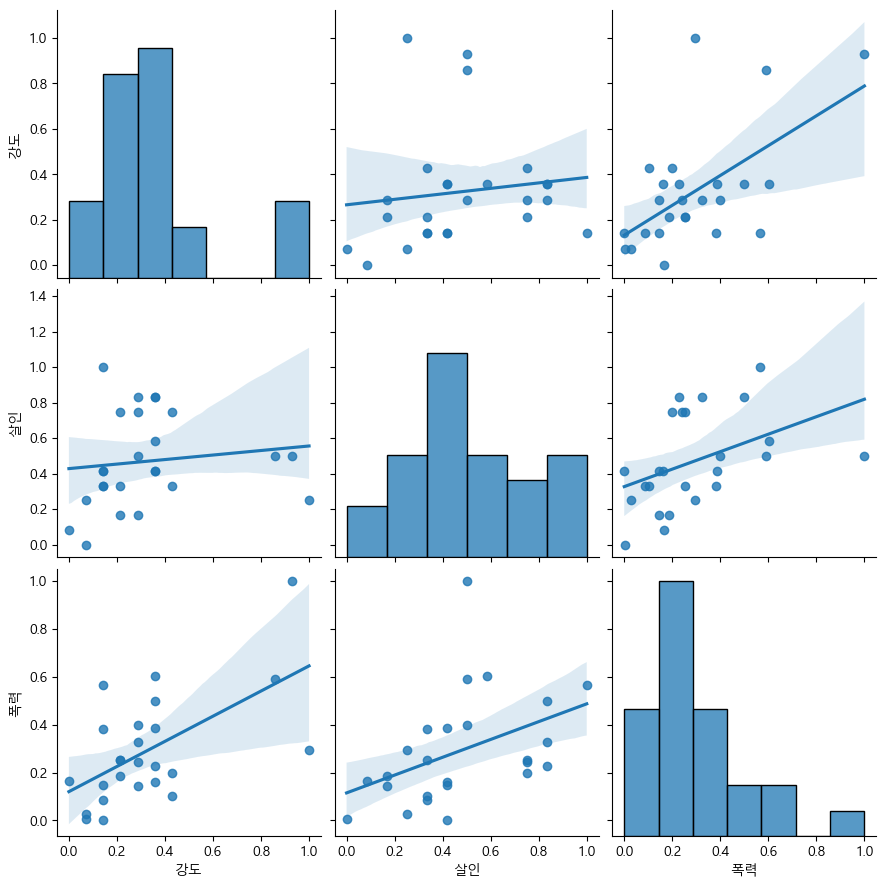

In [45]:
sns.pairplot(crime_anal_norm, vars=['강도', '살인', '폭력'], kind='reg', height=3)
plt.show()

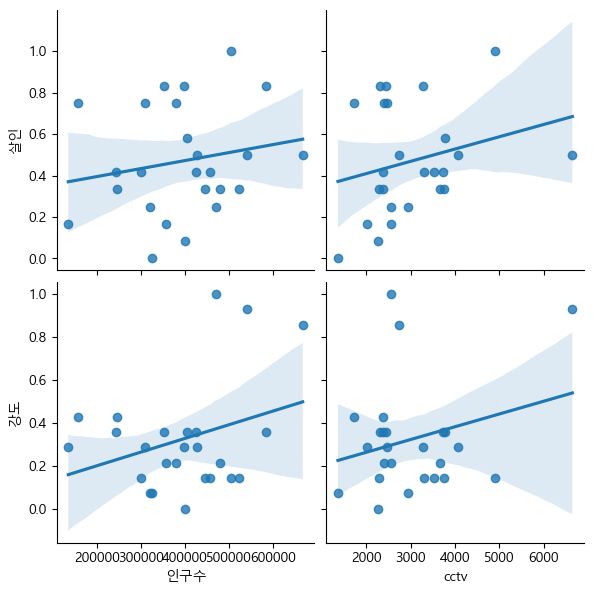

In [46]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'cctv'], 
             y_vars=['살인', '강도'], kind='reg', height=3)
plt.show()

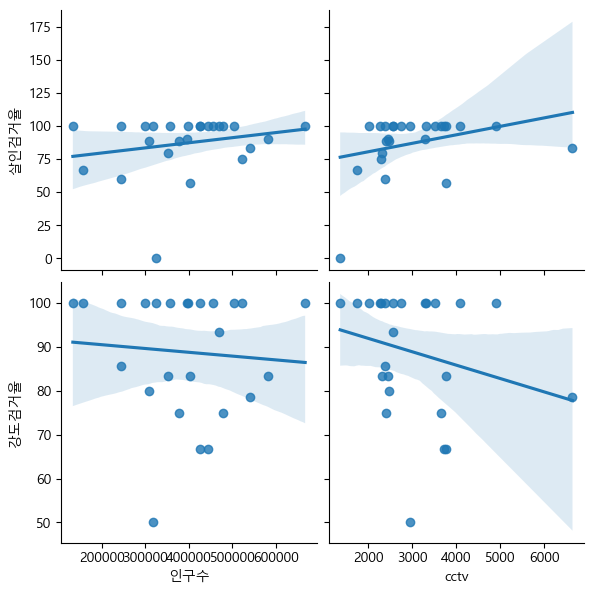

In [47]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'cctv'], 
             y_vars=['살인검거율', '강도검거율'], kind='reg', height=3)
plt.show()

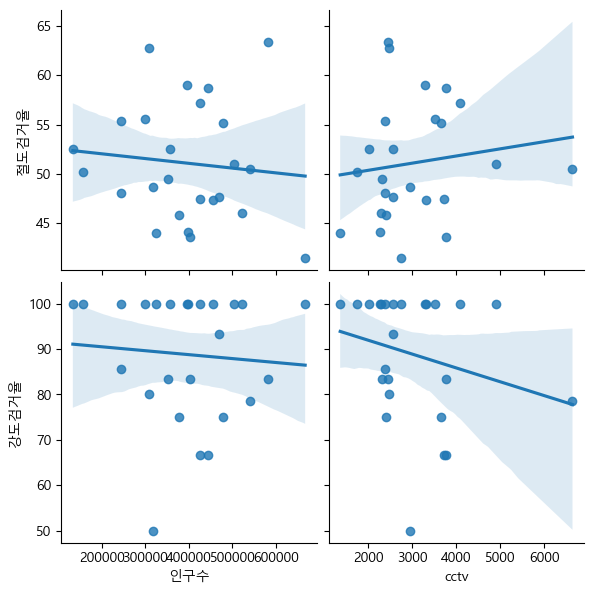

In [48]:
sns.pairplot(crime_anal_norm, x_vars=['인구수', 'cctv'], 
             y_vars=['절도검거율', '강도검거율'], kind='reg', height=3)
plt.show()

In [49]:
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.428571,385.596346
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.108451,417.169212
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.400771,404.161401
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,582804,2437,2.399472,405.815887
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.889901,428.198009


In [50]:
tmp_max = crime_anal_norm['검거'].max()
crime_anal_norm['검거'] = crime_anal_norm['검거'] / tmp_max * 100
crime_anal_norm.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,0.928571,0.500000,1.000000,1.000000,88.559322,78.571429,83.333333,50.525246,84.607017,539538,6645,4.428571,89.462253
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.000000,47.621951,87.384140,468815,2547,2.108451,96.787477
강북구,0.123003,0.285714,0.750000,0.000000,0.242054,83.018868,80.000000,88.888889,62.820513,89.433132,307537,2462,1.400771,93.769533
강서구,0.292332,0.357143,0.833333,0.418701,0.497963,83.773585,83.333333,90.000000,63.351095,85.357873,582804,2437,2.399472,94.153391
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.000000,51.009421,90.091813,504140,4909,2.889901,99.346270


In [51]:
crime_anal_norm_sort = crime_anal_norm.sort_values(by='검거', ascending=False)
crime_anal_norm_sort.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,인구수,cctv,범죄,검거
구별,,,,,,,,,,,,,,
성동구,0.052716,0.142857,0.416667,0.108706,0.000000,85.217391,100.000000,100.0,55.610236,90.188062,298421,3515,0.720945,100.000000
관악구,0.512780,0.142857,1.000000,0.667434,0.566830,87.096774,100.000000,100.0,51.009421,90.091813,504140,4909,2.889901,99.346270
광진구,0.276358,0.214286,0.166667,0.407186,0.184597,87.843137,100.000000,100.0,52.524038,83.949881,356191,2556,1.249092,98.445849
중랑구,0.161342,0.285714,0.833333,0.334408,0.325591,83.606557,100.000000,90.0,59.030544,85.262117,396807,3285,1.940388,96.956846
강동구,0.169329,1.000000,0.250000,0.396131,0.292991,88.829787,93.333333,100.0,47.621951,87.384140,468815,2547,2.108451,96.787477


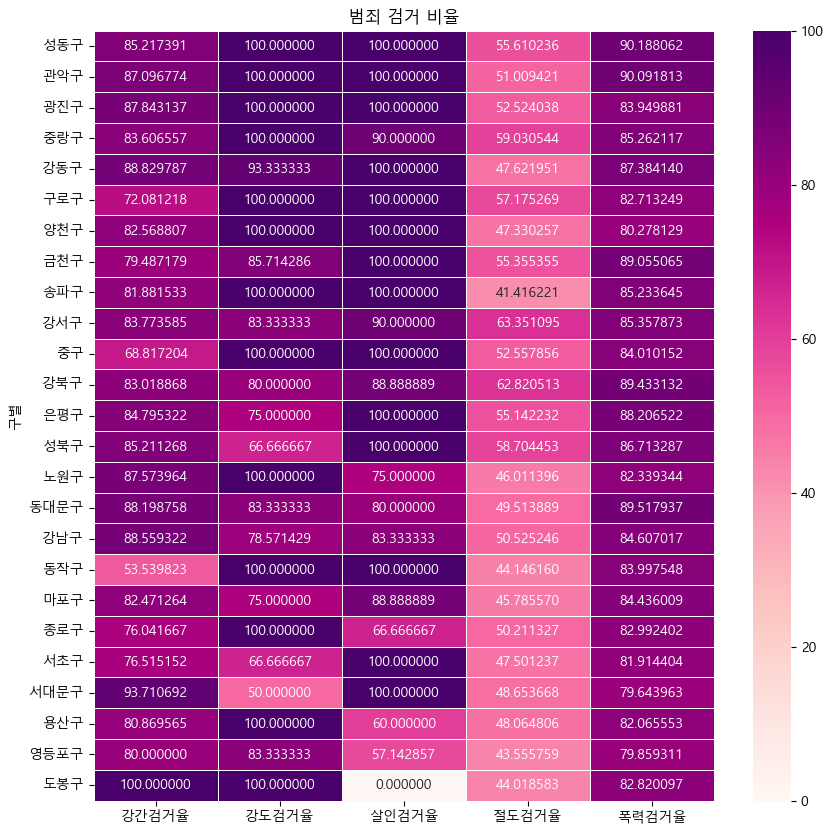

In [53]:
target_col = ['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']
plt.figure(figsize=(10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5, cmap='RdPu')
plt.title('범죄 검거 비율')
plt.show()

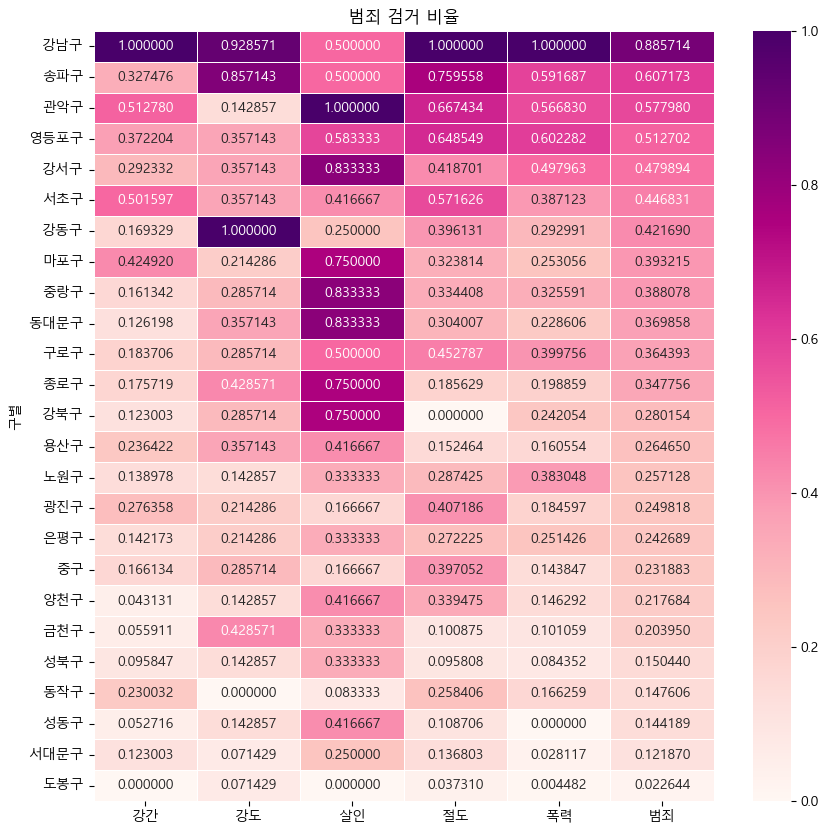

In [54]:
target_col = ['강간', '강도', '살인', '절도', '폭력', '범죄']
crime_anal_norm['범죄'] = crime_anal_norm['범죄']/ 5
crime_anal_norm_sort = crime_anal_norm.sort_values(by='범죄', ascending=False)
plt.figure(figsize=(10, 10))
sns.heatmap(crime_anal_norm_sort[target_col], annot=True, fmt='f', linewidth=.5, cmap='RdPu')
plt.title('범죄 검거 비율')
plt.show()

In [55]:
import folium
import json

In [57]:
geo_path = 'data/seoul_geo.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [58]:
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11,
                 titles='Stamen Toner')

folium.Choropleth(geo_data=geo_str
                  , data=crime_anal_norm['살인']
                  , columns=[crime_anal_norm.index, crime_anal_norm['살인']]
                  , fill_color='PuRd'
                  , key_on='feature.id').add_to(map)
map

In [60]:
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11,
                 titles='Stamen Toner')

folium.Choropleth(geo_data=geo_str
                  , data=crime_anal_norm['범죄']
                  , columns=[crime_anal_norm.index, crime_anal_norm['범죄']]
                  , fill_color='PuRd'
                  , key_on='feature.id').add_to(map)
map

In [61]:
tmp_criminal = crime_anal_norm['살인'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11)

folium.Choropleth(geo_data=geo_str
                  , data=tmp_criminal
                  , columns=[crime_anal_norm.index, tmp_criminal]
                  , fill_color='PuRd'
                  , key_on='feature.id').add_to(map)
map

In [62]:
tmp_criminal = crime_anal_norm['범죄'] / crime_anal_norm['인구수'] * 1000000

map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11)

folium.Choropleth(geo_data=geo_str
                  , data=tmp_criminal
                  , columns=[crime_anal_norm.index, tmp_criminal]
                  , fill_color='PuRd'
                  , key_on='feature.id').add_to(map)
map

In [63]:
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11,
                 titles='Stamen Toner')

folium.Choropleth(geo_data=geo_str
                  , data=crime_anal_norm['검거']
                  , columns=[crime_anal_norm.index, crime_anal_norm['검거']]
                  , fill_color='PuRd'
                  , key_on='feature.id').add_to(map)
map

In [64]:
crime_police['lat'] = station_lat
crime_police['lng'] = station_lng

target_col = ['강간검거', '강도검거', '살인검거', '절도검거', '폭력검거']
tmp = crime_police[target_col] / crime_police[target_col].max()
crime_police['검거'] = np.sum(tmp, axis=1)
crime_police.head()

죄종,구분,강간검거,강도검거,살인검거,절도검거,폭력검거,강간발생,강도발생,살인발생,절도발생,폭력발생,구별,lat,lng,검거
0,강남,433,10,3,1016,1911,513,12,5,1941,2283,강남구,37.509435,127.066958,3.543280
1,강동,167,14,3,781,1697,188,15,3,1640,1942,강동구,37.528511,127.126822,2.866701
2,강북,132,4,8,490,1625,159,5,9,780,1817,강북구,37.637197,127.027305,2.327791
3,강서,222,5,9,1070,2087,265,6,10,1689,2445,강서구,37.551362,126.850280,3.384092
4,관악,351,3,12,1137,2355,403,3,12,2229,2614,관악구,37.474395,126.951349,3.987094


In [65]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_police.index:
    folium.Marker([crime_police['lat'][n], crime_police['lng'][n]]).add_to(map)

map

In [67]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

for n in crime_police.index:
    folium.CircleMarker([crime_police['lat'][n], crime_police['lng'][n]]
                 , radius=crime_police['검거'][n]*10
                 ,color='#3186cc'
                 , fill_color='#3186cc').add_to(map)

map

In [71]:
map = folium.Map(location=[37.5502, 126.982],
                 zoom_start=11)

folium.Choropleth(geo_data=geo_str
                  , data=crime_anal_norm['검거']
                  , columns=[crime_anal_norm.index, crime_anal_norm['검거']]
                  , fill_color='PuRd'
                  , key_on='feature.id').add_to(map)

for n in crime_police.index:
    folium.CircleMarker([crime_police['lat'][n], crime_police['lng'][n]]
                 , radius=crime_police['검거'][n]*10
                 ,color='#3186cc'
                 , fill_color='#3186cc').add_to(map)

map